# Trabajo Computacional 3

In [2]:
#import sys
#sys.path.append('/home/lucia/.local/lib/python2.7/site-packages')

In [98]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import numpy as np
from  collections  import defaultdict
from scipy import optimize
import os
from lectura import ldata
import community
import rpy2.robjects as robjects
#import robjects as robjects


In [99]:
# El directorio que vamos a usar en cada lectura de datos de ahora en mas
directorio = os.path.dirname(os.path.realpath("dolphins.txt"))

In [100]:
fnDOL = os.path.join(directorio,'dolphins.gml')
delfines = nx.read_gml(fnDOL)
generos=ldata('dolphinsGender.txt')

In [121]:
# Asigno la clase genero a cada nodo de la red
for delfin in generos:
    if delfin[1]=='m':
        delfines.node[delfin[0]]["genero"]=0
    elif delfin[1]=='f':
        delfines.node[delfin[0]]["genero"]=1
    else:
        delfines.node[delfin[0]]["genero"]=2

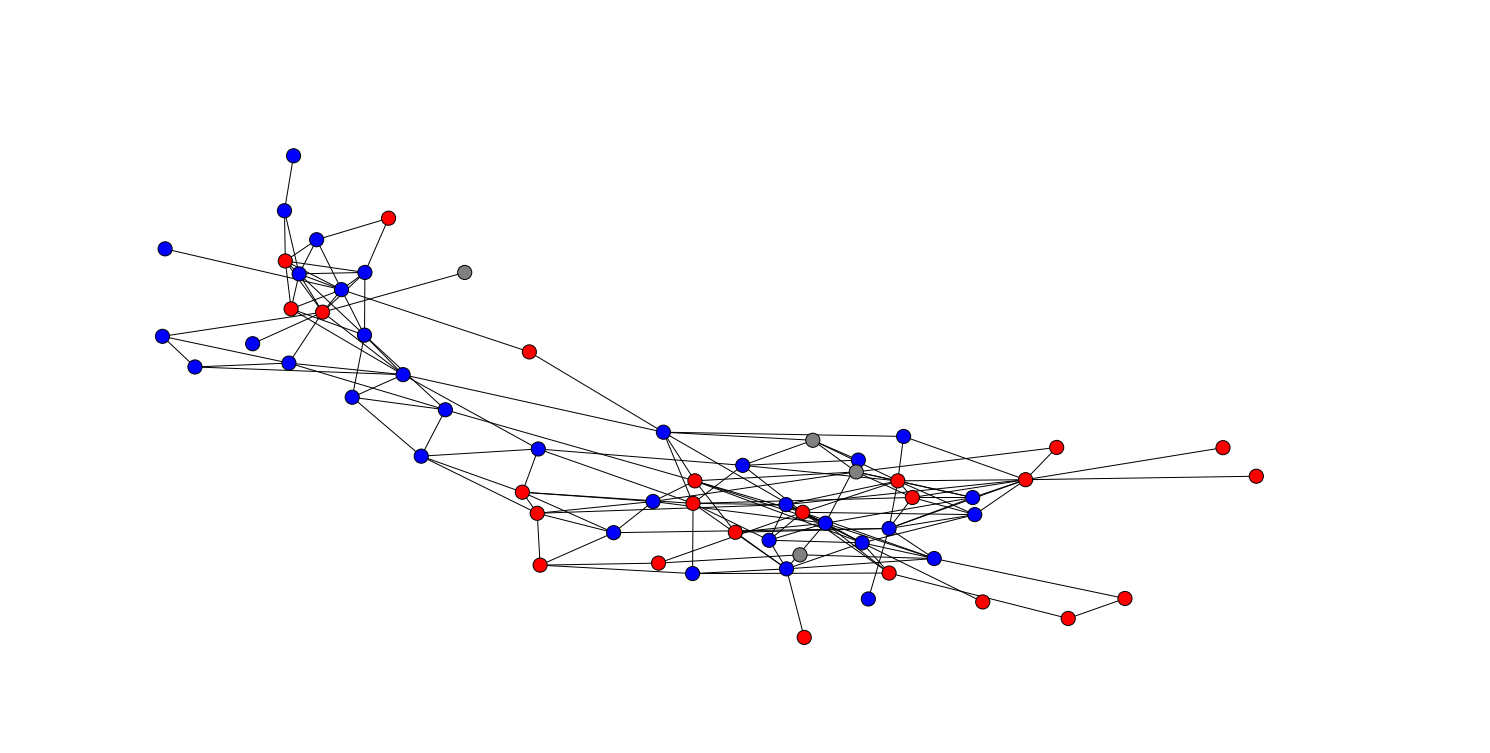

In [122]:
plt.figure(figsize=(20,10))
nx.draw(delfines, 
        width=1, 
        node_color=["blue" if g==0 else "red" if g==1 else "grey"  for g in nx.get_node_attributes(delfines, "genero").values()], 
        node_size=200,
        with_labels=False,
       pos=nx.fruchterman_reingold_layout(delfines)
       )
plt.show()

In [5]:
#delfines.edges

Encuentre la partición en clusters de esta red utilizando la metodología Louvain, infomap,fast_greedy y edge_betweenness. Visualice los resultados gráficamente.

In [103]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read_graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- cluster_fast_greedy(G, 
                    merges = TRUE, 
                    modularity = TRUE, 
                    membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                c <- cluster_infomap(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)

In [104]:
labels_fastgreedy = community(delfines,"fast_greedy")
labels_bet = community(delfines,"edge_betweenness")
labels_louvain = community(delfines,"louvain")
labels_infomap = community(delfines,"infomap")

dict_values([1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 3.0, 4.0, 1.0, 2.0, 3.0, 1.0, 4.0, 2.0, 2.0, 5.0, 4.0, 4.0, 1.0, 1.0, 3.0, 1.0, 2.0, 5.0, 2.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 3.0, 3.0, 2.0, 4.0, 4.0])


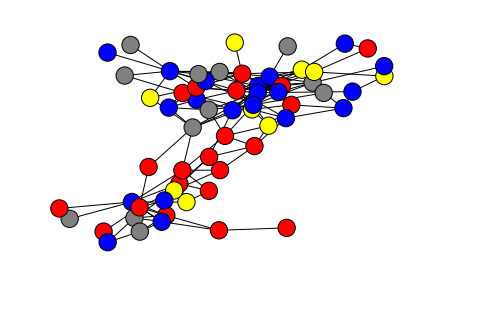

In [105]:
comunidades = dict()

for d,i in zip(delfines,labels_bet):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'edge_betweenness')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"edge_betweenness").values()],)
print (nx.get_node_attributes(delfines, 'edge_betweenness').values())

dict_values([4.0, 2.0, 1.0, 4.0, 1.0, 2.0, 2.0, 2.0, 4.0, 5.0, 3.0, 2.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 3.0, 1.0, 2.0, 4.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 4.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0, 5.0, 1.0, 4.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 4.0, 4.0, 2.0, 3.0, 2.0])


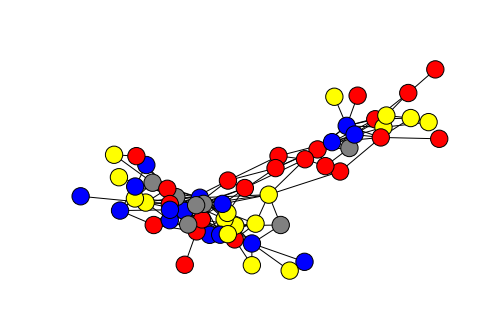

In [106]:
comunidades = dict()

for d,i in zip(delfines,labels_fastgreedy):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'fastgreedy')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"fastgreedy").values()],)
print (nx.get_node_attributes(delfines, "fastgreedy").values())

dict_values([1.0, 5.0, 4.0, 1.0, 4.0, 5.0, 5.0, 5.0, 2.0, 1.0, 4.0, 5.0, 2.0, 2.0, 5.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 2.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 2.0, 5.0, 4.0, 3.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0, 1.0, 4.0, 2.0, 5.0, 4.0, 2.0, 4.0, 5.0, 4.0, 2.0, 2.0, 5.0, 3.0, 1.0])


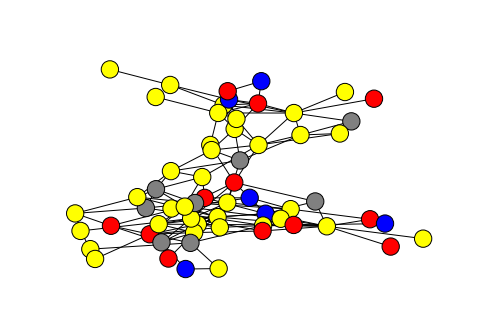

In [107]:
comunidades = dict()
G.nodes(data=True)
for d,i in zip(delfines,labels_louvain):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'louvain')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"louvain").values()],)
print (nx.get_node_attributes(delfines, "louvain").values())

dict_values([5.0, 1.0, 2.0, 5.0, 2.0, 1.0, 1.0, 1.0, 3.0, 5.0, 2.0, 1.0, 3.0, 3.0, 1.0, 5.0, 3.0, 3.0, 4.0, 2.0, 1.0, 3.0, 2.0, 4.0, 1.0, 1.0, 6.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 1.0, 6.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 5.0, 2.0, 3.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 1.0, 4.0, 4.0])


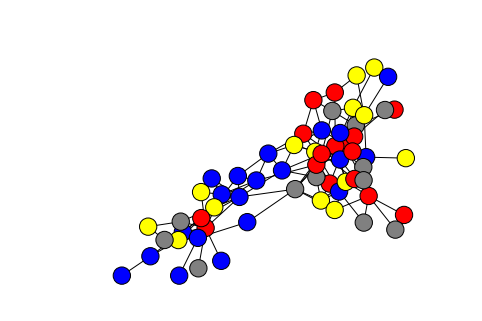

In [108]:
comunidades = dict()

for d,i in zip(delfines,labels_infomap):
    comunidades[d]=i
    
nx.set_node_attributes(delfines, comunidades, 'infomap')
nx.draw(delfines,node_color=["blue" if g==1.0 else "red" if g==2.0 else "grey" if g==3.0 else "yellow" for g in nx.get_node_attributes(delfines,"infomap").values()],)
print (nx.get_node_attributes(delfines, "infomap").values())

In [109]:
#Modularidad
def modularidad(G,atributo):
    Q=0. #modularidad
    TotalEdges=G.number_of_edges()
    for cluster in set(nx.get_node_attributes(G,atributo).values()):
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        L=0.#Cantidad de edges al interior de un cluster 
        a=0.#candidad de posibles edges del cluster
        for nodo1 in nodescluster:
            a=a+G.degree(nodo1)
            for nodo2 in nodescluster:
                if (nodo1,nodo2) in G.edges():
                    L+=1
        Q=Q+(L/(2*TotalEdges)-(a/(2*TotalEdges))**2) #Se suma la modularidad del cluster
    return Q

In [110]:
#Silouethe
def silouethe(G,atributo):
    S={}
    for nodo,atri in G.nodes(data=True):
        dis=nx.diameter(G)

        cluster=atri[atributo]
        nodescluster = [x for x,y in G.nodes(data=True) if y[atributo]==cluster]
        a=np.mean([nx.shortest_path_length(G,nodo,nodo2) for nodo2 in nodescluster])
        b=min([nx.shortest_path_length(G,nodo,nodo2)for nodo2 in G.nodes()-nodescluster])        
        s=(b-a)/max(a,b)
        S[nodo]=s
    return np.mean(list(S.values()))

In [111]:
algoritmo='fastgreedy'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.509295518373482 -0.192288919885


In [112]:
algoritmo='edge_betweenness'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.5193821446936434 -0.0891137027125


In [113]:
algoritmo='louvain'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.5188283691309679 -0.170311543508


In [114]:
algoritmo='infomap'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.5247419010323958 -0.103452479721


In [127]:
algoritmo='genero'
print(modularidad(delfines,algoritmo),silouethe(delfines,algoritmo))

0.12370950516197939 -0.576322302739


In [115]:
def MatrizConfu(G,atributo1,atributo2):
    tx=len(set(nx.get_node_attributes(G,atributo1).values()))
    ty=len(set(nx.get_node_attributes(G,atributo2).values()))
    M=np.zeros((tx+1,ty+1))
    for node,atri in G.nodes(data=True):
        i=int(atri[atributo1])
        j=int(atri[atributo2])
        M[i][j]+=1
    M=M/np.sum(M)
    return M

In [123]:
G=delfines
atributo=[0,0,0,0,0]
atributo[0]='fastgreedy'
atributo[1]='edge_betweenness'
atributo[2]='louvain'
atributo[3]='infomap'
atributo[4]='genero'
lista=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
for i in range(5):
    for j in range(5):
        lista[i][j]=MatrizConfu(G,atributo[i],atributo[j])
#lista es la tabla de matrices de confusión

In [124]:
informacion=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
for i in range(5):
    for j in range(5):
        matriz=lista[i][j]
        marginal1=np.sum(matriz,axis=0)
        marginal2=np.sum(matriz,axis=1)
        entropiatotal=0
        entropia1=0
        entropia2=0
        flatmatriz = [item for sublist in matriz for item in sublist]
        for k in range(len(flatmatriz)):
            if flatmatriz[k]>0:
                    entropiatotal+=-flatmatriz[k]*np.log(flatmatriz[k])

        for k in range(len(marginal1)):
            if marginal1[k]>0:
                    entropia1+=-marginal1[k]*np.log(marginal1[k])

        for k in range(len(marginal2)):
            if marginal2[k]>0:
                    entropia2+=-marginal2[k]*np.log(marginal2[k])

        try:
            informacion[i][j]=float(2*(entropia1+entropia2-entropiatotal)/(entropia1+entropia2))
        except:
            informacion[i][j]=0

In [125]:
informacion

[[1.0,
  0.7012807848160696,
  0.7698020746411716,
  0.7963504329946544,
  0.17089386804732637],
 [0.7012807848160696,
  1.0,
  0.7834028833139997,
  0.9110976567878418,
  0.20791114932240795],
 [0.7698020746411718,
  0.7834028833139997,
  1.0,
  0.8818064122723199,
  0.16494279029443765],
 [0.7963504329946544,
  0.911097656787842,
  0.8818064122723202,
  1.0,
  0.24645512416119403],
 [0.17089386804732637,
  0.20791114932240795,
  0.16494279029443765,
  0.24645512416119403,
  1.0]]

In [126]:
#random

In [163]:
sexos=dict(delfines.node.data("genero"))
N=100
G=delfines
random=np.zeros((4,N))
# N realizaciones aleatorias de genero  
for j in range(N):
    for delfin,genero in zip(G,np.random.permutation(list(sexos.values()))):
        # Asigna genero a delfines(nodos) de test a partir de la realizacion aleatoria       
        G.node[delfin]["genero2"]=genero
        for i in range(4):
            matriz=MatrizConfu(G,atributo[i],"genero2")
            marginal1=np.sum(matriz,axis=0)
            marginal2=np.sum(matriz,axis=1)
            entropiatotal=0
            entropia1=0
            entropia2=0
            flatmatriz = [item for sublist in matriz for item in sublist]
            for k in range(len(flatmatriz)):
                if flatmatriz[k]>0:
                        entropiatotal+=-flatmatriz[k]*np.log(flatmatriz[k])

            for k in range(len(marginal1)):
                if marginal1[k]>0:
                        entropia1+=-marginal1[k]*np.log(marginal1[k])

            for k in range(len(marginal2)):
                if marginal2[k]>0:
                        entropia2+=-marginal2[k]*np.log(marginal2[k])
            try:
                random[i][j]=float(2*(entropia1+entropia2-entropiatotal)/(entropia1+entropia2))
            except:
                random[i][j]=0


In [164]:
for metodo in random:
    print(np.mean(metodo))


0.0661327503665
0.0672479116722
0.0641681908344
0.0774691190647
